# 1. 추천시스템(RecSys) 소개
## 1.1 정의와 목적
**추천 시스템이란?**

- 사용자가 아이템에 부여한 평점이나 선호도를 예측하는 정보필터링 시스템의 일종
- 사용자가 사용한 아이템에 대한 제안을 제공하는 소프트웨어 도구나 테크닉
- 사용자와 아이템의 상호작용을 다루는 기본적인 툴
<br></br>

**추천 시스템의 목적은?**
- 사용자에게 새로운 컨텐츠 제공
- 사용자가 좋아할만한 컨텐츠 제공
- 사용자에게 개인화된 경험 제공
즉, 사용자의 선호를 모델링하고, 이를 통해 비즈니스 목표를 달성한다.

## 1.2 다양한 Personalized Service 사례
- Netflix RecSys(Gomez-Uribe and Hunt, 2016)
- Amazon RecSys(Linden et al., 2003)
- Google Ads(McMahan et al. 2013)
- Facebook Ads(He et al., 2014)
- Alibaba Ads(Zhou et al., 2018)
<br></br>

Personalized Education(Learning)

: 사용자의 문제풀이 이력을 바탕으로 현재 지식 수준으로 모델링하여 사용자가 취약한 부분이나 필요한 부분의 Learning Pass를 제공.
- Item Response Theory(Khajah et al., 2014)
- Bayesian Knowledge Tracing(Corbett & Anderson, 1995)
- Deep Knowledge Tracing(Piech et al., 2015)
- Neural Cognitive Diagnosis(Wang et al., 2020)
<br></br>

Personalized Healthcare

: 사용자의 질병 진단 이력이나 의약품 처방 이력 등 여러가지 실험 결과의 데이터를 통해 미래 질병 예측.
- Diagnosis prediction(Choi et al., 2016)
- Personalized Herat rate modeling(Ni et al., 2019)
- EHR-based phenotyping(Hripcsak and Albers, 2013)
- Precision Medicine(Hodson, 2016)

## 1.3 기존 ML 방법론과의 차이
다음의 사용자 로그 데이터를 바탕으로 사용자 별로 좋아할만한 아이템을 추천해보자.

이때, 전통적인 지도학습의 한 형태인 Linear Regression 형태의 predictor를 가정한다.
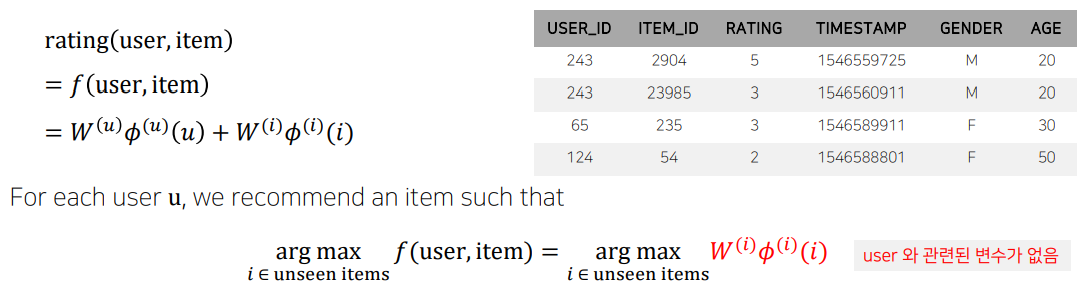
- 모든 사용자들에게 동일한 추천(e.g., most popular)이 이루어진다(non-personalized)
- User와 Item 간의 상호작용을 고려하여 설계할 수도 있으나 모든 조합의 경우를 고려하는 것은 비효율적이다.
- 어떤 도메인에서 어떤 feature가 효과적인지 미리 알 수 없으며 features가 존재하지 않을 수도 있다.
- RecSys 방법론은 이러한 시나리오에서 개인화된 예측을 위한 근본적인 방법론이다.
<br></br>

사용자(u) - 아이템(i) 간의 관계(compatibility)를 명시적으로 모델링한다 : compatibility = $f(u,i)$

즉, CV, NLP에서는 이미지, 텍스트라는 단일 entity를 다루는 반면,

RecSys에서는(사용자, 이미지) 또는 (사용자, 텍스트)로 주어지는 각 조합의 상호작용을 모델링한다.
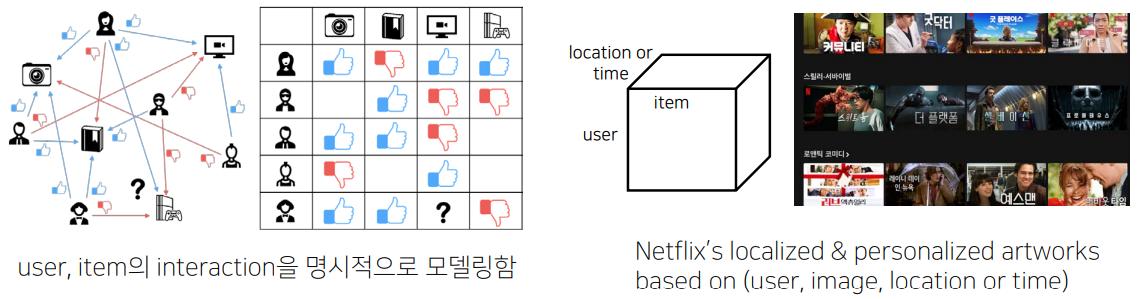

다양한 compatibility function $f(u,i)$의 형태 :
- MF : inner product with dense vectors
- NBCF : Cosine/Pearson?Jaccard sim. with one-hot vectors
- Neural CF : MLP with concatenation
- Collaborative Metric Learning : Euclidean distance
- Latent Cross : element-wise product

대부분의 추천시스템 연구 및 방법론은 다음의 관점으로 볼 수 있다.

: 사용자와 아이템을 어떻게 더 잘 표현할지(better representations of users and items) 또는 어떠한 형태의 compatibility function을 사용할지.

<br></br>
Set과 Matrix를 통해 사용자-아이템 상호작용 데이터를 표현해보자.
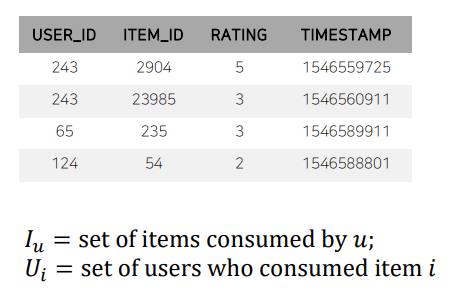
Set을 사용한 interaction data의 표현은 item-to-item or user-to-user similarity 계산 및 추천 시스템의 성능을 평가할 때 유용하다.

<br></br>
상호작용을 나타내는 행렬 C(consumed)와 평점을 나타내는 행렬 R(rated)은 다음과 같다.
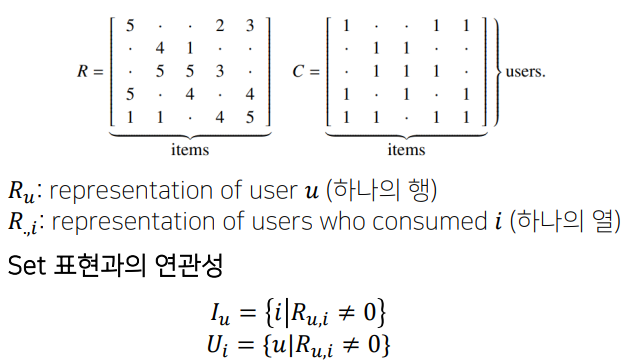

## 1.4 추천 시스템 방법론의 전통적인 분류
**추천 시스템은 그것이 사용하는 데이터의 형태에 따라 크게 CF(input: ratings)와 Content-based 방법(input: item attributes)로 구분된다.**

특히 CF는 전통적인 Memory기반(neighborhood 기반 이라고도 함)의 방법과 Model기반의 방법으로 구분된다.
- Memory 기반 : Amazon 추천 시스템(linden et al., 2003)
- Model 기반 : Netflix Prize Winner Solution(Koren, 2009)
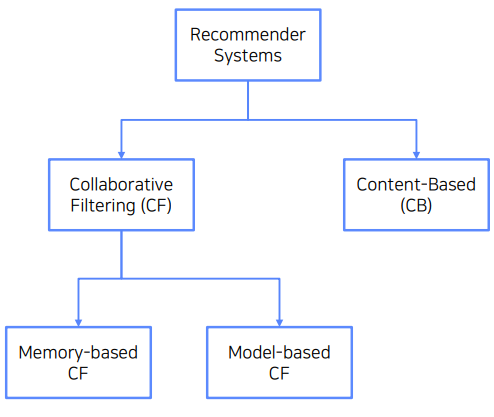

# 2. 딥러닝 기반의 추천 시스템
## 2.1 Why DL for RecSys?
**최근 딥러닝 기반 추천 시슽메이 다양한 Industrial application 성공 사례들을 필두로 각광받고 있다. 딥러닝 기반 추천 시스템이 상공적으로 적용될 수 있는 이유는 다음과 같다(Zhang et al., 2019)**

- 1) 사용이 편리한 end-to-end architecture(doesn't require domain-specific feature engineering)
- 2) input data type에 알맞은 inductive bias를 제공한다(e.g., CNN for images, RNN for sequences)
- 3) 복잡한 비선형 상호작용을 포착할 수 있는 representation learning ability
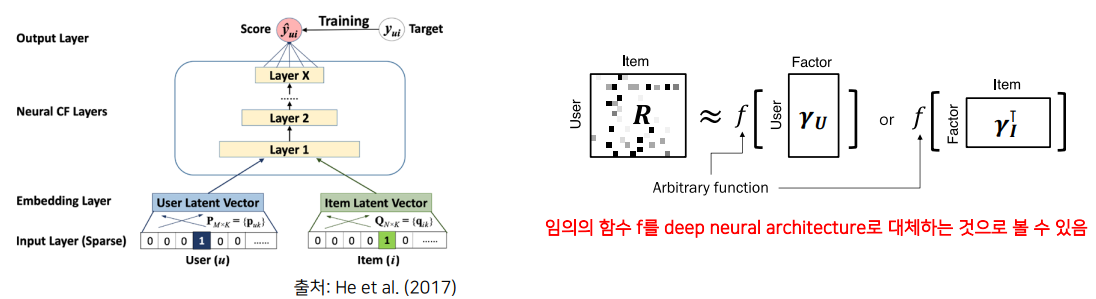

**Wide & Deep Learning(Cheng et al. 2016)**
- Google Play Store App Recommendation
- Logistic Regression(wide) + DNN(deep)
- Memorization(wide) + Generalization(deep)
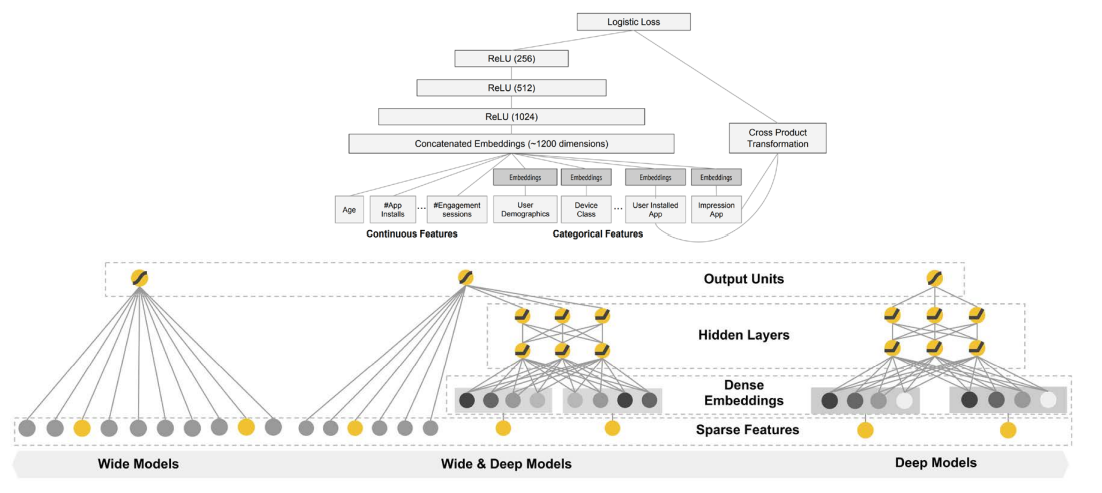

**Collaborative Metric Learning(Hsieh et al., 2017)**
- Compatibility function을 inner product에서 Euclidean distance로 대체했다.
- 사용자와 그가 선호하는 아이템 사이의 거리는 최대한 가깝게한다.
- 사용자와 그가 싫어하는 아이템 사이의 거리는 최대한 멀게한다.
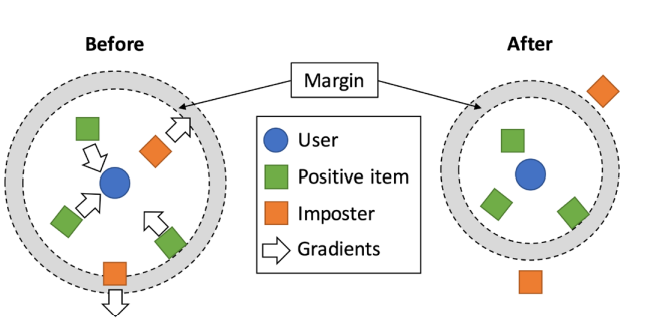

**Deep Content-based Music Recommendation(Van Den Oord et al., 2013)**
- Audio Signal(content)을 CNN으로 처리하여 음악 추천에 활용했다.
- MF + CNN의 성공적인 응용 사례가 있다.
- 단순 이력에 기반한 CF에 비해 더욱 다양한 추천 결과를 얻을 수 있다.
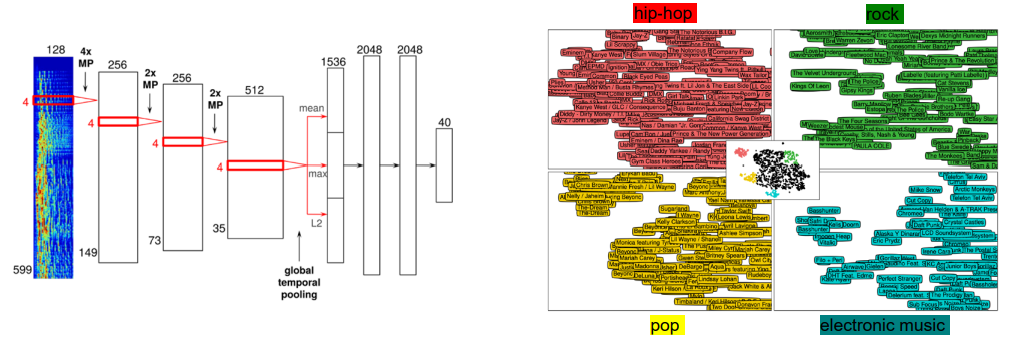

**Self-Attentive Sequential Rcommendation(Kang and McAuley, 2018)**
- Transforemr 구조를 활용하여 sequential dynamics를 고려하는 추천이다(what to see next?).
- User ID 없이 session 내의 순차적인 browsing history 만으로도 추천이 가능하다(user-free).
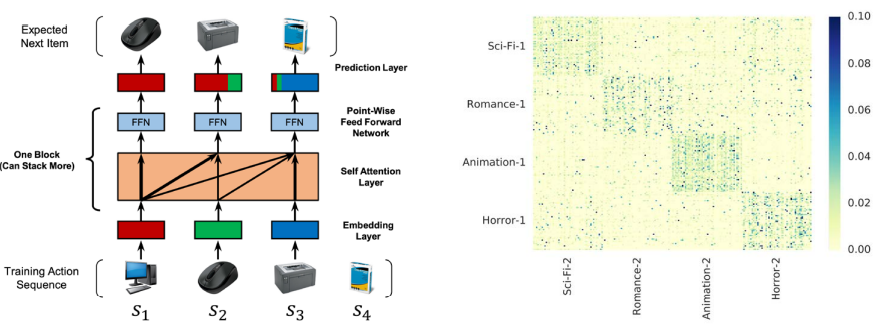

## 2.2 Potential Limitations of DL for RecSys
**DL for RecSys : 여러 강점에도 불구하고 다음과 같은 잠재적 한계도 존재한다(Zhang et al., 2019).**
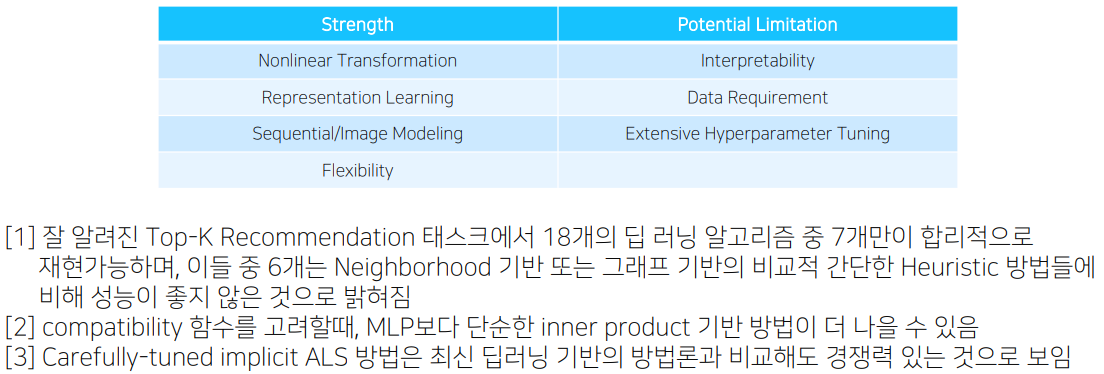

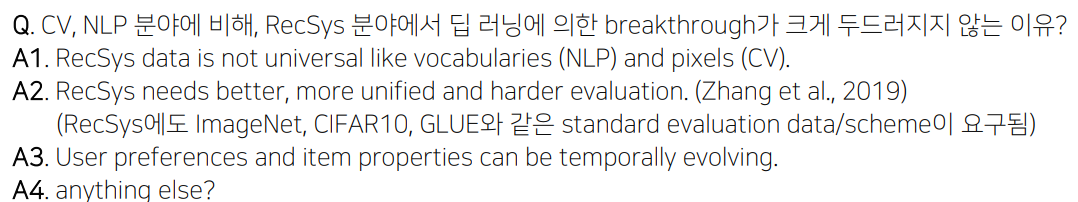